# **Prediction using Decision Tree Algorithm**
Level : intermediate

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

***loading the iris dataset ***

In [8]:
data = pd.read_csv('/content/Iris (1).csv')
data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


***Exploring the dataframe***

In [11]:
data.shape

(150, 6)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


We can notice that the dataset has 150 rows and 6 columns, including the index column, and there are no null values.

In [13]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

We can observe that the target column 'Species' contains three categories of data.

In [14]:
data.corr()

<ipython-input-14-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


We notice that :


*  PetalLength and PetalWidth are positively correlated (strong correlation: 0.962757), indicating that they evolve together. Similarly, PetalWidth and SepalLength also show a positive correlation (0.817954).



<ipython-input-20-b532aba67b65>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(data.corr(), annot = True)


<Axes: >

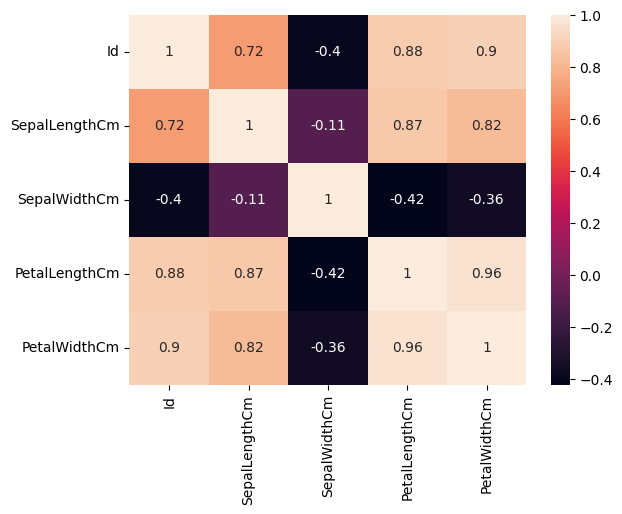

In [20]:
#plotting the correlation
sb.heatmap(data.corr(), annot = True)

# **Decision Tree Algorithm**

In [86]:
X = data.drop(columns=['Id','Species'])
y = data['Species']

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [88]:
print(X_train.shape)
print(y_test.shape)
print(X_test.shape)
print(y_train.shape)



(112, 4)
(38,)
(38, 4)
(112,)


In [89]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=2 ,random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred))

0.9736842105263158


# **Visualization of the tree**

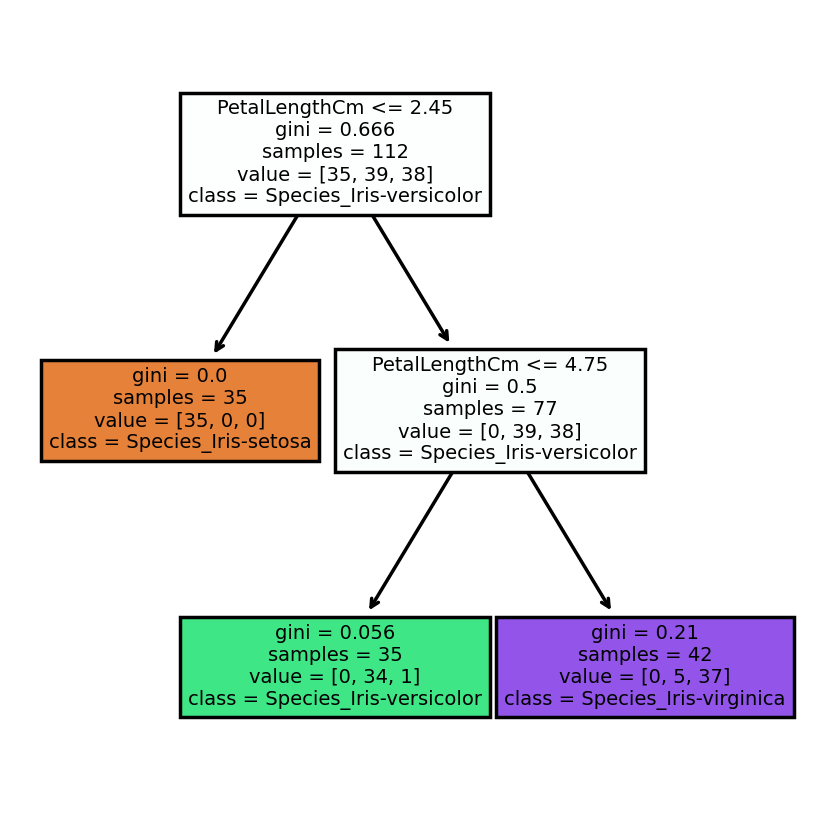

In [92]:
from sklearn import tree
feature_names = ['SepalLengthCm',	'SepalWidthCm',	'PetalLengthCm',	'PetalWidthCm']
class_names = ['Species_Iris-setosa', 'Species_Iris-versicolor', 'Species_Iris-virginica']
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(4,4),dpi=250,facecolor= 'White')
tree.plot_tree(clf,feature_names = feature_names,class_names = class_names, filled = True)
fig.savefig('IrisTreeClassifier.png')